# taitanic

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing

In [62]:
df= pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


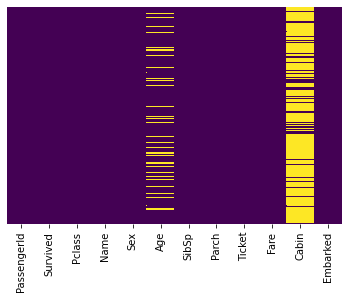

In [63]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

at first we want to taking care of missing data , so we do this with random forest 
we do to steps:
    1. taking care of missing data in Age column
    2. taking care of missing data in Age coloumn

## 1. taking care of missing data in Age coloumn

In [64]:
df0 = df.copy()
df0.drop(['Cabin'], axis=1, inplace=True)
df0.drop(['PassengerId'], axis=1, inplace=True)
df0.drop(['Ticket'], axis=1, inplace=True)
df0.drop(['Embarked'], axis=1, inplace=True)
df0 = df0.dropna()

column = df0.pop('Name')
df0.insert(0, 'Name', column)
column = df0.pop('Age')
df0.insert(0, 'Age', column)

df0

,Age,Name,Survived,Pclass,Sex,SibSp,Parch,Fare
0,22.0,"Braund, Mr. Owen Harris",0,3,male,1,0,7.2500
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,1,0,71.2833
2,26.0,"Heikkinen, Miss. Laina",1,3,female,0,0,7.9250
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,1,0,53.1000
4,35.0,"Allen, Mr. William Henry",0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...,...
885,39.0,"Rice, Mrs. William (Margaret Norton)",0,3,female,0,5,29.1250
886,27.0,"Montvila, Rev. Juozas",0,2,male,0,0,13.0000
887,19.0,"Graham, Miss. Margaret Edith",1,1,female,0,0,30.0000
889,26.0,"Behr, Mr. Karl Howell",1,1,male,0,0,30.0000


In [65]:
x = df0.iloc[:, 2:].values
y = df0.iloc[:, 0].values


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])


In [69]:
from sklearn.ensemble import RandomForestRegressor
for_perdict_Age = RandomForestRegressor(n_estimators = 1000, random_state = 0)
for_perdict_Age.fit(x, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [70]:
df1 = df.copy()
df1.drop(['Cabin'], axis=1, inplace=True)
df1.drop(['PassengerId'], axis=1, inplace=True)
df1.drop(['Ticket'], axis=1, inplace=True)
df1.drop(['Embarked'], axis=1, inplace=True)

column = df1.pop('Name')
df1.insert(0, 'Name', column)

column = df1.pop('Age')
df1.insert(0, 'Age', column)
    

df1

,Age,Name,Survived,Pclass,Sex,SibSp,Parch,Fare
0,22.0,"Braund, Mr. Owen Harris",0,3,male,1,0,7.2500
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,1,0,71.2833
2,26.0,"Heikkinen, Miss. Laina",1,3,female,0,0,7.9250
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,1,0,53.1000
4,35.0,"Allen, Mr. William Henry",0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,27.0,"Montvila, Rev. Juozas",0,2,male,0,0,13.0000
887,19.0,"Graham, Miss. Margaret Edith",1,1,female,0,0,30.0000
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,female,1,2,23.4500
889,26.0,"Behr, Mr. Karl Howell",1,1,male,0,0,30.0000


In [72]:
x = df1.iloc[:,2:].values

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])


In [76]:
new_age = for_perdict_Age.predict(x)
new_age = pd.Series(new_age)
df.pop('Age')
df.insert(0, 'Age', new_age)
df

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22.646792,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,39.933200,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,26.239708,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,33.842490,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,31.595618,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,31.350347,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
887,28.809633,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
888,23.800100,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S
889,50.237440,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C


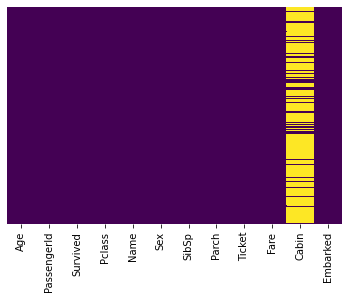

In [77]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 2. taking care of missing data in cabin coloumn

In [78]:
df0 = df.copy()

df0.drop(['PassengerId'], axis=1, inplace=True)
df0.drop(['Ticket'], axis=1, inplace=True)
df0.drop(['Embarked'], axis=1, inplace=True)
df0 = df0.dropna()
column = df0.pop('Name')
df0.insert(0, 'Name', column)
column = df0.pop('Cabin')
df0.insert(0, 'Cabin', column)

df0

,Cabin,Name,Age,Survived,Pclass,Sex,SibSp,Parch,Fare
1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",39.933200,1,1,female,1,0,71.2833
3,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",33.842490,1,1,female,1,0,53.1000
6,E46,"McCarthy, Mr. Timothy J",50.104750,0,1,male,0,0,51.8625
10,G6,"Sandstrom, Miss. Marguerite Rut",10.026771,1,3,female,1,1,16.7000
11,C103,"Bonnell, Miss. Elizabeth",51.736970,1,1,female,0,0,26.5500
...,...,...,...,...,...,...,...,...,...
871,D35,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",42.225633,1,1,female,1,1,52.5542
872,B51 B53 B55,"Carlsson, Mr. Frans Olof",35.188799,0,1,male,0,0,5.0000
879,C50,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",49.065283,1,1,female,0,1,83.1583
887,B42,"Graham, Miss. Margaret Edith",28.809633,1,1,female,0,0,30.0000


In [79]:
x = df0.iloc[:, 2:].values
y = df0.iloc[:, 0].values

In [80]:
le = LabelEncoder()
x[:,3] = le.fit_transform(x[:,3])
y = le.fit_transform(y)

In [81]:
for_perdict_cabin = RandomForestRegressor(n_estimators = 1000, random_state = 0)
for_perdict_cabin.fit(x, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [82]:
df1 = df.copy()



df1.drop(['PassengerId'], axis=1, inplace=True)
df1.drop(['Ticket'], axis=1, inplace=True)
df1.drop(['Embarked'], axis=1, inplace=True)

column = df1.pop('Name')
df1.insert(0, 'Name', column)
column = df1.pop('Cabin')
df1.insert(0, 'Cabin', column)
    

df1

,Cabin,Name,Age,Survived,Pclass,Sex,SibSp,Parch,Fare
0,NaN,"Braund, Mr. Owen Harris",22.646792,0,3,male,1,0,7.2500
1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",39.933200,1,1,female,1,0,71.2833
2,NaN,"Heikkinen, Miss. Laina",26.239708,1,3,female,0,0,7.9250
3,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",33.842490,1,1,female,1,0,53.1000
4,NaN,"Allen, Mr. William Henry",31.595618,0,3,male,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,NaN,"Montvila, Rev. Juozas",31.350347,0,2,male,0,0,13.0000
887,B42,"Graham, Miss. Margaret Edith",28.809633,1,1,female,0,0,30.0000
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",23.800100,0,3,female,1,2,23.4500
889,C148,"Behr, Mr. Karl Howell",50.237440,1,1,male,0,0,30.0000


In [83]:
x = df1.iloc[:,2:].values
x

array([[22.64679239302364, 0, 3, ..., 1, 0, 7.25],
       [39.9332, 1, 1, ..., 1, 0, 71.2833],
       [26.23970793650793, 1, 3, ..., 0, 0, 7.925],
       ...,
       [23.800099999999997, 0, 3, ..., 1, 2, 23.45],
       [50.23744047619047, 1, 1, ..., 0, 0, 30.0],
       [44.040672567179534, 0, 3, ..., 0, 0, 7.75]], dtype=object)

In [84]:
x[:,3] = le.fit_transform(x[:,3])

In [85]:
new_cabin = for_perdict_cabin.predict(x)
new_cabin = pd.Series(new_cabin)
df.pop('Cabin')
df.insert(0, 'Cabin', new_age)
df

,Cabin,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,22.646792,22.646792,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,39.933200,39.933200,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,26.239708,26.239708,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,33.842490,33.842490,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,31.595618,31.595618,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,31.350347,31.350347,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,28.809633,28.809633,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,23.800100,23.800100,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,50.237440,50.237440,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


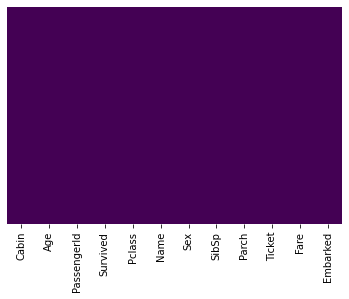

In [86]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
df.dropna()

,Cabin,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,22.646792,22.646792,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,39.933200,39.933200,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,26.239708,26.239708,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,33.842490,33.842490,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,31.595618,31.595618,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,31.350347,31.350347,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,28.809633,28.809633,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,23.800100,23.800100,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,50.237440,50.237440,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [89]:
#df.set_index("Name")

column = df.pop('Fare')
df.insert(0, 'Fare', column)

column = df.pop('Parch')
df.insert(0, 'Parch', column)

column = df.pop('SibSp')
df.insert(0, 'SibSp', column)

column = df.pop('Sex')
df.insert(0, 'Sex', column)

column = df.pop('Pclass')
df.insert(0, 'Pclass', column)

column = df.pop('Age')
df.insert(0, 'Age', column)

column = df.pop('Embarked')
df.insert(0, 'Embarked', column)

column = df.pop('PassengerId')
df.insert(0, 'PassengerId', column)

column = df.pop('Ticket')
df.insert(0, 'Ticket', column)

column = df.pop('Cabin')
df.insert(0, 'Cabin', column)          
#
#
column = df.pop('Name')
df.insert(0, 'Name', column)
column = df.pop('Survived')
df.insert(0, 'Survived', column)
#df.pop("PassengerId")
df = df.dropna()
df

,Survived,Name,Cabin,Ticket,PassengerId,Embarked,Age,Pclass,Sex,SibSp,Parch,Fare
0,0,"Braund, Mr. Owen Harris",22.646792,A/5 21171,1,S,22.646792,3,male,1,0,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",39.933200,PC 17599,2,C,39.933200,1,female,1,0,71.2833
2,1,"Heikkinen, Miss. Laina",26.239708,STON/O2. 3101282,3,S,26.239708,3,female,0,0,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",33.842490,113803,4,S,33.842490,1,female,1,0,53.1000
4,0,"Allen, Mr. William Henry",31.595618,373450,5,S,31.595618,3,male,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",31.350347,211536,887,S,31.350347,2,male,0,0,13.0000
887,1,"Graham, Miss. Margaret Edith",28.809633,112053,888,S,28.809633,1,female,0,0,30.0000
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",23.800100,W./C. 6607,889,S,23.800100,3,female,1,2,23.4500
889,1,"Behr, Mr. Karl Howell",50.237440,111369,890,C,50.237440,1,male,0,0,30.0000


In [90]:
fdf = df.copy()
fdf.pop('Ticket')
x = fdf.iloc[:, 2:].values
y = df.iloc[:, 0].values


In [91]:
x[:,2]= le.fit_transform(x[:,2])

In [92]:
x[:,-4]= le.fit_transform(x[:,-4])

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy')
classifier.fit(x, y)

RandomForestClassifier(criterion='entropy', n_estimators=2000)

=============================================

=============================================

=============================================

# Import test file and perprocessing it

In [95]:
dftest= pd.read_csv('test.csv')
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


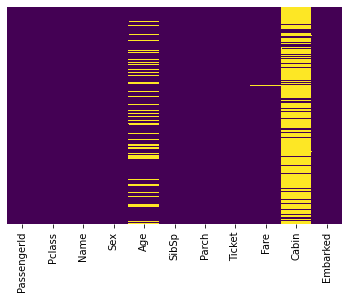

In [96]:
sns.heatmap(dftest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [97]:
df0 = dftest.copy()
df0.drop(['Cabin'], axis=1, inplace=True)
df0.drop(['PassengerId'], axis=1, inplace=True)
df0.drop(['Ticket'], axis=1, inplace=True)
df0.drop(['Embarked'], axis=1, inplace=True)
df0 = df0.dropna()
column = df0.pop('Name')
df0.insert(0, 'Name', column)
column = df0.pop('Age')
df0.insert(0, 'Age', column)

df0

,Age,Name,Pclass,Sex,SibSp,Parch,Fare
0,34.5,"Kelly, Mr. James",3,male,0,0,7.8292
1,47.0,"Wilkes, Mrs. James (Ellen Needs)",3,female,1,0,7.0000
2,62.0,"Myles, Mr. Thomas Francis",2,male,0,0,9.6875
3,27.0,"Wirz, Mr. Albert",3,male,0,0,8.6625
4,22.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,1,1,12.2875
...,...,...,...,...,...,...,...
409,3.0,"Peacock, Miss. Treasteall",3,female,1,1,13.7750
411,37.0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,female,1,0,90.0000
412,28.0,"Henriksson, Miss. Jenny Lovisa",3,female,0,0,7.7750
414,39.0,"Oliva y Ocana, Dona. Fermina",1,female,0,0,108.9000


In [98]:
x = df0.iloc[:, 2:].values
y = df0.iloc[:, 0].values


In [99]:
x[:,1] = le.fit_transform(x[:,1])

In [100]:
for_perdict_Age_test = RandomForestRegressor(n_estimators = 1000, random_state = 0)
for_perdict_Age_test.fit(x, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [101]:
df1 = dftest.copy()
df1.drop(['Cabin'], axis=1, inplace=True)
df1.drop(['PassengerId'], axis=1, inplace=True)
df1.drop(['Ticket'], axis=1, inplace=True)
df1.drop(['Embarked'], axis=1, inplace=True)
column = df1.pop('Name')
df1.insert(0, 'Name', column)

column = df1.pop('Age')
df1.insert(0, 'Age', column)
    

df1

,Age,Name,Pclass,Sex,SibSp,Parch,Fare
0,34.5,"Kelly, Mr. James",3,male,0,0,7.8292
1,47.0,"Wilkes, Mrs. James (Ellen Needs)",3,female,1,0,7.0000
2,62.0,"Myles, Mr. Thomas Francis",2,male,0,0,9.6875
3,27.0,"Wirz, Mr. Albert",3,male,0,0,8.6625
4,22.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,1,1,12.2875
...,...,...,...,...,...,...,...
413,NaN,"Spector, Mr. Woolf",3,male,0,0,8.0500
414,39.0,"Oliva y Ocana, Dona. Fermina",1,female,0,0,108.9000
415,38.5,"Saether, Mr. Simon Sivertsen",3,male,0,0,7.2500
416,NaN,"Ware, Mr. Frederick",3,male,0,0,8.0500


In [102]:
x = df1.iloc[:,2:].values

In [103]:
x[:,1] = le.fit_transform(x[:,1])

In [104]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
x = imputer.transform(x)
t = pd.DataFrame(x)
t = t.rename(columns={
    0 : 'Pclass',
    1 : 'Sex',
    2 : 'SibSp',
    3 : 'Parch' , 
    4 :'Fare'
})
new_age = for_perdict_Age_test.predict(x)
new_age = pd.Series(new_age)
t.insert(0, 'Age', new_age)


a = le.fit_transform(dftest.iloc[:,-1].values)
a = pd.Series(a)
t.insert(0, 'Embarked', a)

column = dftest.pop('PassengerId')
t.insert(0, 'PassengerId', column)

column = dftest.pop('Ticket')
t.insert(0, 'Ticket', column)

column = df1.pop('Name')
t.insert(0, 'Name', column)

column = dftest.pop('Cabin')
t.insert(0, 'Cabin', column)


dftest = t
dftest

,Cabin,Name,Ticket,PassengerId,Embarked,Age,Pclass,Sex,SibSp,Parch,Fare
0,NaN,"Kelly, Mr. James",330911,892,1,31.288931,3.0,1.0,0.0,0.0,7.8292
1,NaN,"Wilkes, Mrs. James (Ellen Needs)",363272,893,2,41.396622,3.0,0.0,1.0,0.0,7.0000
2,NaN,"Myles, Mr. Thomas Francis",240276,894,1,49.978953,2.0,1.0,0.0,0.0,9.6875
3,NaN,"Wirz, Mr. Albert",315154,895,2,22.664466,3.0,1.0,0.0,0.0,8.6625
4,NaN,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3101298,896,2,16.127330,3.0,0.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,"Spector, Mr. Woolf",A.5. 3236,1305,2,26.579568,3.0,1.0,0.0,0.0,8.0500
414,C105,"Oliva y Ocana, Dona. Fermina",PC 17758,1306,0,37.364000,1.0,0.0,0.0,0.0,108.9000
415,NaN,"Saether, Mr. Simon Sivertsen",SOTON/O.Q. 3101262,1307,2,31.619602,3.0,1.0,0.0,0.0,7.2500
416,NaN,"Ware, Mr. Frederick",359309,1308,2,26.579568,3.0,1.0,0.0,0.0,8.0500


#### Taking care of missing data for cabin 

In [106]:
dfl = dftest.copy().dropna()
dfl

,Cabin,Name,Ticket,PassengerId,Embarked,Age,Pclass,Sex,SibSp,Parch,Fare
12,B45,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",21228,904,2,28.590000,1.0,0.0,1.0,0.0,82.2667
14,E31,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",W.E.P. 5734,906,2,38.418567,1.0,0.0,1.0,0.0,61.1750
24,B57 B59 B63 B66,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",PC 17608,916,0,48.805500,1.0,0.0,1.0,3.0,262.3750
26,B36,"Ostby, Miss. Helene Ragnhild",113509,918,0,26.720240,1.0,0.0,0.0,1.0,61.9792
28,A21,"Brady, Mr. John Bertram",113054,920,2,41.057514,1.0,1.0,0.0,0.0,30.5000
...,...,...,...,...,...,...,...,...,...,...,...
404,D40,"Frauenthal, Mr. Isaac Gerald",17765,1296,0,43.375171,1.0,1.0,1.0,0.0,27.7208
405,D38,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",SC/PARIS 2166,1297,0,23.072221,2.0,1.0,0.0,0.0,13.8625
407,C80,"Widener, Mr. George Dunton",113503,1299,0,50.876500,1.0,1.0,1.0,1.0,211.5000
411,C78,"Minahan, Mrs. William Edward (Lillian E Thorpe)",19928,1303,1,36.100000,1.0,0.0,1.0,0.0,90.0000


In [107]:
y = dfl.iloc[:,0].values
y= le.fit_transform(y)
x = dfl.iloc[:,4:].values

In [108]:
for_perdict_cabin_test = RandomForestRegressor(n_estimators = 1000, random_state = 0)
for_perdict_cabin_test.fit(x, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [109]:
x = dftest.iloc[:,4:].values
new_cabin = for_perdict_cabin_test.predict(x)
new_cabin = pd.Series(new_cabin)
dftest.pop('Cabin')
dftest.insert(0, 'Cabin', new_cabin)
dftest

,Cabin,Name,Ticket,PassengerId,Embarked,Age,Pclass,Sex,SibSp,Parch,Fare
0,65.708863,"Kelly, Mr. James",330911,892,1,31.288931,3.0,1.0,0.0,0.0,7.8292
1,58.527500,"Wilkes, Mrs. James (Ellen Needs)",363272,893,2,41.396622,3.0,0.0,1.0,0.0,7.0000
2,52.200383,"Myles, Mr. Thomas Francis",240276,894,1,49.978953,2.0,1.0,0.0,0.0,9.6875
3,70.560471,"Wirz, Mr. Albert",315154,895,2,22.664466,3.0,1.0,0.0,0.0,8.6625
4,73.224800,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3101298,896,2,16.127330,3.0,0.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,69.750874,"Spector, Mr. Woolf",A.5. 3236,1305,2,26.579568,3.0,1.0,0.0,0.0,8.0500
414,32.532000,"Oliva y Ocana, Dona. Fermina",PC 17758,1306,0,37.364000,1.0,0.0,0.0,0.0,108.9000
415,69.414174,"Saether, Mr. Simon Sivertsen",SOTON/O.Q. 3101262,1307,2,31.619602,3.0,1.0,0.0,0.0,7.2500
416,69.750874,"Ware, Mr. Frederick",359309,1308,2,26.579568,3.0,1.0,0.0,0.0,8.0500


In [110]:
dftest.isnull().values.any()

False

In [111]:
cdf = dftest.copy()
cdf.pop('Name')
cdf.pop('Ticket')
print(cdf.columns==fdf.columns[2:])

[ True  True  True  True  True  True  True  True  True]


In [112]:
x  = cdf.values


In [115]:
print(
    classifier.predict(x)
     )

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0]
